## $$\text{Limite de confianza superior}$$

##### El problema del bandido multibrazo

- Tenemos `d` brazos. Por ejemplo, los brazos son anuncios que mostramos a los usuarios cuando se conectan a un página web.
- Cada vez que un usuario se conecta a la página web, se desencadena una ronda.
- En cada ronda,`n`, se elige uno de los anuncios a ser mostrado al usuario.
$$ r_i(n) = 1 \text{ Si el usuario hace click en el anuncio i en la ronda n}$$
$$ r_i(n) = 0 \text{ Si el usuario no hace click en el anuncio i en la ronda n}$$

- Nuestra meta es maximizar la recompensa a través de las rondas que se llevan a cabo.

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd

dataset = pd.read_csv('../data/Ads_CTR_Optimisation.csv')
dataset

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9995,0,0,1,0,0,0,0,1,0,0
9996,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0
9998,1,0,0,0,0,0,0,1,0,0


`Contexto: Tenemos un total de 10 anuncios de publicidad, debemos basarnos en cual es el mejor para nuestra proxima campaña de marketing (maximizar la tasa de conversión). Y nos piden que usar la ciencia de datos sobre la estrategia del Test A/B (que no es la mejor opción y es más costosa)`

#### Uso del algoritmo Upper Confidence Bound

**Paso 1:** A cada ronda n, se consideran dos números para cada **`i`**
- $N_i(n)$ El número de veces que el anuncio **`i`** se selecciona en la ronda **`n`**
- $R_i(n)$ La suma de las recompensas del anuncio **`i`** hasta la ronda **`n`**

**Paso 2:** A partir de estos números calculamos
- La recompensa media del anuncio **`i`** hasta la ronda **`n`**
$$ \bar{r}_i(n) = \frac{R_i(n)}{N_i(n)}$$
- El intervalo de confianza en la ronda **`n`**
$$ (\bar{r}_i(n) - \Delta_i(n), \bar{r}_i(n) + \Delta_i(n))$$
$$\text{con } \Delta_i(n) = \sqrt \frac{3 \log{(n)}}{2N_i(n)}$$


**Paso 3:** Se selecciona el anuncio **`i`** con mayor límite superior del intervalo de confianza (UCB)

In [51]:
# paso 1
d = 10
number_of_selections = [0]*d
sums_of_rewards = [0]*d

# paso 2
N = 10000
import math

ads_selected = []
total_reward = 0
for n in range(0,N):
    max_upper_bound = 0
    ad = 0
    for i in range(0,d):
        if number_of_selections[i] > 0:
            #La recompensa media del anuncio i hasta la ronda n
            averange_reward = sums_of_rewards[i]/number_of_selections[i]
            #El intervalo de confianza en la ronda n
            delta_i = math.sqrt(3/2*math.log(n+1)/number_of_selections[i])
            upper_bound = averange_reward + delta_i
        else:
            upper_bound = 1e400
        if upper_bound>max_upper_bound:
            max_upper_bound = upper_bound
            ad = i
    
    ads_selected.append(ad)
    number_of_selections[ad] = number_of_selections[ad] +1 
    reward = dataset.values[n,ad]
    sums_of_rewards[ad] = sums_of_rewards[ad] + reward
    total_reward = total_reward +reward


### Histograma de resultados

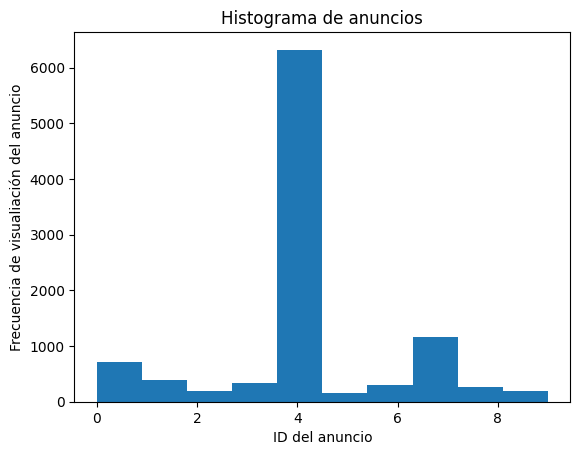

In [53]:
plt.hist(ads_selected)
plt.title("Histograma de anuncios")
plt.xlabel("ID del anuncio")
plt.ylabel("Frecuencia de visualiación del anuncio")
plt.show()